In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [27]:
def ExpGaussian(x,a0,a1,x0,A,sigma, mu, B, sigma2, mu2):
    f= a0+a1*(x-x0)+A*np.exp(-0.5*((mu-x)/sigma)**2)+B*np.exp(-0.5*((mu2-x)/sigma2)**2)
    return f 
def Gaussian(x, A,sigma, mu):
    g=A*np.exp(-0.5*((mu-x)/sigma)**2)
    return g

In [28]:
AAire22Na=np.loadtxt('Aire_22Na_mtime_05min.dat', unpack=True)
AArena22Na05=np.loadtxt('Arena_05cm_22Na_mtime_05min.dat',unpack=True)
AArena22Na10=np.loadtxt('Arena_10cm_22Na_mtime_05min.dat',unpack=True)
AParafina22Na8=np.loadtxt('Parafina_08cm_22Na_mtime_05min.dat',unpack=True)
AParafina22Na16=np.loadtxt('Parafina_16cm_22Na_mtime_05min.dat',unpack=True)
N=[i+1 for i in range(1024)]

In [29]:
#Energy Calibration E= a0+a1*N
def EnergyCalibration22Na(x):
    E2Na=1274.5
    A2=np.amax(AAire22Na[600:1000]) #Corresponds to E2Na=1274.5 keV
    m2=np.where(AAire22Na==A2)[0]

    E1Na=511
    A1=np.amax(AAire22Na[200:400]) #Corresponds to E1Na=511 keV
    m1=np.where(AAire22Na==A1)[0]
    E= E1Na+ ((E1Na-E2Na)/(m2-m1))*m1 + ((E2Na-E1Na)/(m2-m1))*x
    return E 

E22Na=EnergyCalibration22Na(N)

In [34]:
#1
popt, pcov = curve_fit(ExpGaussian, N[250:1024], AAire22Na[250:1024], p0=[700,-10,335,29300,12,350, 3600,15,815])
Ad1Aire22Na=[Gaussian(i, popt[3], popt[4], popt[5]) for i in range(len(N))]
EAire22Na=[ExpGaussian(i, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8]) for i in range(len(N))]

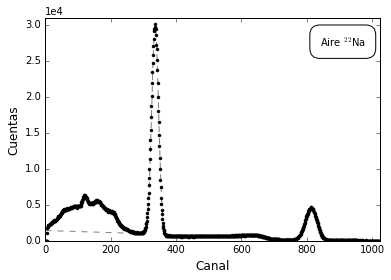

In [35]:
plt.show()
#plt.xlim(300,370)
#plt.xlim(700,900)
plt.ylim(0, 31000)
plt.xlim(0,1024)
#plt.plot(N, Ad1Aire22Na, '--')
#plt.plot(N, Ad2Aire22Na, '.',color='black')
plt.plot(N, EAire22Na, '--',color='grey', )
plt.plot(N,AAire22Na, '.',label='Aire ${}^{22}$Na', color='black')
plt.text(840, 27000, 'Aire ${}^{22}$Na', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
#plt.legend(loc=1)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('Cuentas', fontsize=12)
plt.savefig("Aire22Na.pdf")

In [55]:
popt, pcov = curve_fit(ExpGaussian, N[300:1024], AArena22Na05[300:1024], p0=[1500,-100,335,14500,12,335,2700,18,815])
EArena22Na05=[ExpGaussian(i, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8]) for i in range(len(N))]

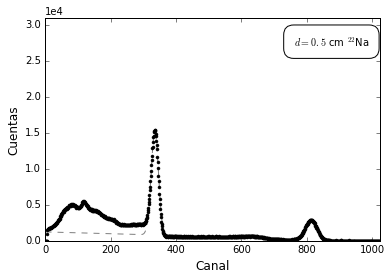

In [56]:
plt.show()
plt.ylim(0, 31000)
plt.xlim(0,1024)
plt.plot(N, EArena22Na05, '--',color='grey', )
plt.plot(N,AArena22Na05, '.',label='Aire ${}^{22}$Na', color='black')
plt.text(760, 27000, '$d=0.5$ cm ${}^{22}$Na', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
#plt.legend(loc=1)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('Cuentas', fontsize=12)
plt.savefig("Arena22Na05.pdf")

In [57]:
popt, pcov = curve_fit(ExpGaussian, N[300:1024], AArena22Na10[300:1024], p0=[1500,-100,335,8200,12,335, 2100,18,815])
EArena22Na10=[ExpGaussian(i, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8]) for i in range(len(N))]

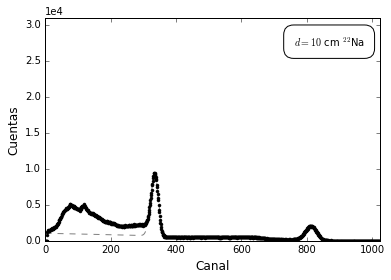

In [58]:
plt.show()
plt.ylim(0, 31000)
plt.xlim(0,1024)
plt.plot(N, EArena22Na10, '--',color='grey', )
plt.plot(N,AArena22Na10, '.',label='Aire ${}^{22}$Na', color='black')
plt.text(760, 27000, '$d=10$ cm ${}^{22}$Na', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
#plt.legend(loc=1)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('Cuentas', fontsize=12)
plt.savefig("Arena22Na10.pdf")

In [59]:
popt, pcov = curve_fit(ExpGaussian, N[300:1024], AParafina22Na8[300:1024], p0=[2000,-100,335,14000,12,335, 2800,18,815])
EParafina22Na8=[ExpGaussian(i, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8]) for i in range(len(N))]

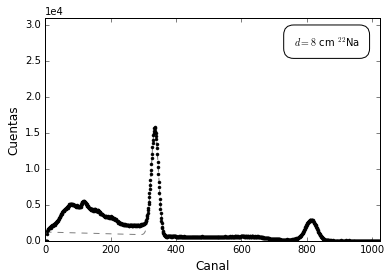

In [60]:
plt.show()
plt.ylim(0, 31000)
plt.xlim(0,1024)
plt.plot(N, EParafina22Na8, '--',color='grey', )
plt.plot(N,AParafina22Na8, '.',label='Parafina ${}^{22}$Na', color='black')
plt.text(760, 27000, '$d=8$ cm ${}^{22}$Na', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
#plt.legend(loc=1)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('Cuentas', fontsize=12)
plt.savefig("Parafina22Na8.pdf")

In [61]:
popt, pcov = curve_fit(ExpGaussian, N[300:1024], AParafina22Na16[300:1024], p0=[1500,-100,335,7200,12,335, 1700,18,815])
EParafina22Na16=[ExpGaussian(i, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8]) for i in range(len(N))]

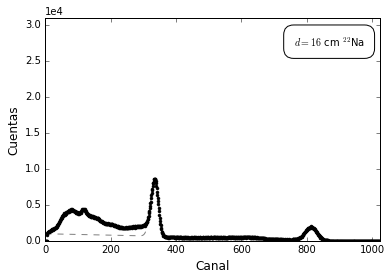

In [62]:
plt.show()
plt.ylim(0, 31000)
plt.xlim(0,1024)
plt.plot(N, EParafina22Na16, '--',color='grey', )
plt.plot(N,AParafina22Na16, '.',label='Parafina ${}^{22}$Na', color='black')
plt.text(760, 27000, '$d=16$ cm ${}^{22}$Na', color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
#plt.legend(loc=1)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('Cuentas', fontsize=12)
plt.savefig("Parafina22Na16.pdf")